# Modelling and evaluation

Explantion of what we are doing

### Importing modules

In [71]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE 


# Models for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# GridsearchCV and Cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline

#Scaling for KNN
from sklearn.preprocessing import MinMaxScaler

#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



### Importing data

In [72]:
df = pd.read_csv('PreProcessedData.csv', sep=",")

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551636 entries, 0 to 551635
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         551636 non-null  int64  
 1   State              551636 non-null  int64  
 2   Zip                551636 non-null  int64  
 3   NAICS              551636 non-null  int64  
 4   ApprovalFY         551636 non-null  int64  
 5   Term               551636 non-null  int64  
 6   NoEmp              551636 non-null  int64  
 7   NewExist           551636 non-null  int64  
 8   CreateJob          551636 non-null  int64  
 9   RetainedJob        551636 non-null  int64  
 10  FranchiseCode      551636 non-null  int64  
 11  UrbanRural         551636 non-null  int64  
 12  LowDoc             551636 non-null  int64  
 13  DisbursementGross  551636 non-null  float64
 14  MIS_Status         551636 non-null  int64  
 15  GrAppv             551636 non-null  float64
 16  Ra

,Unnamed: 0,State,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,Ratio
0,12,27,27502,44,2006,162,2,2,0,0,1,1,0,253400.0,1,253400.0,0.75
1,24,2,72223,72,2006,126,7,1,0,0,0,1,0,137300.0,1,137300.0,0.85
2,28,4,93010,61,2006,83,18,2,5,23,0,1,0,438541.0,1,100000.0,0.50
3,30,9,33186,23,2006,84,4,1,0,4,0,1,0,51440.0,1,35000.0,0.50
4,32,18,70130,53,2006,60,3,1,0,0,0,1,0,50000.0,1,50000.0,0.85


### Establish baseline

In [73]:
X = df[['State','Zip','NAICS','Term','NoEmp','NewExist','CreateJob','RetainedJob','FranchiseCode','UrbanRural','LowDoc','DisbursementGross','GrAppv','Ratio']]

y = df['MIS_Status']

X.columns

Index(['State', 'Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc',
       'DisbursementGross', 'GrAppv', 'Ratio'],
      dtype='object')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(413727, 14) (413727,) (137909, 14) (137909,)


In [75]:
sum(y)/len(y)*100

76.14767709141536

In [76]:
#EVT. CUT DENNE DEL UD HVIS DET IKKE GIVER MENING
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_y_pred = dummy.predict(X_test)

print("Score: {:.3f}".format(dummy.score(X_train, y_train)))
print("Score: {:.3f}".format(dummy.score(X_test, y_test)))

Score: 0.762
Score: 0.761


In [77]:
#EVT. CONFUSION MATRIX PÅ BAGGRUND AF DUMMY
#cm = confusion_matrix(y_test, dum_y_pred)
#print(cm)

In [78]:
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

sum(y_SMOTE)/len(y_SMOTE)

0.5

In [79]:
#New test and train set after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, random_state=42)

print("Xtrain", X_train.shape, "y_train", 
      y_train.shape, "X_test", X_test.shape, "y_test", y_test.shape) 

Xtrain (630087, 14) y_train (630087,) X_test (210029, 14) y_test (210029,)


In [80]:
#Try dummy test again after SMOTE
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_y_pred = dummy.predict(X_test)

print("Score: {:.3f}".format(dummy.score(X_train, y_train)))
print("Score: {:.3f}".format(dummy.score(X_test, y_test)))

Score: 0.501
Score: 0.498


Evaluation and confusion matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    105430
           1       0.50      1.00      0.66    104599

    accuracy                           0.50    210029
   macro avg       0.25      0.50      0.33    210029
weighted avg       0.25      0.50      0.33    210029

[[     0 105430]
 [     0 104599]]


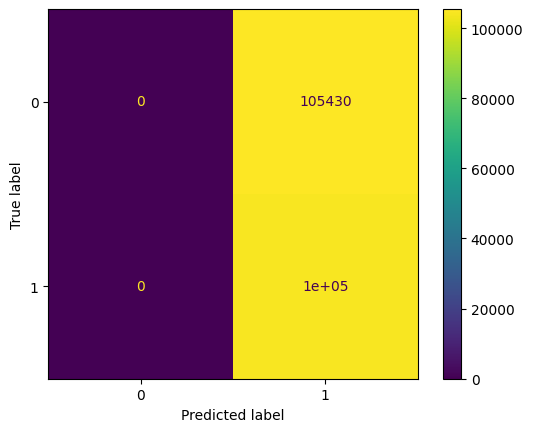

In [81]:
# https://stackoverflow.com/questions/66022943/how-to-fix-this-classification-report-warning
print(classification_report(y_test, dummy_y_pred, zero_division=0)) #LÆS KORT OP PÅ zerodivision

cm_dummy = confusion_matrix(y_test, dummy_y_pred)
print(cm_dummy)

cm_graph = ConfusionMatrixDisplay(confusion_matrix=cm_dummy, display_labels=dummy.classes_)
cm_graph.plot()

# CLASSIFIERS (MODELS)

Explanation of process and procedure

### Logistic Regression

In [82]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

#For evaluating later
LogReg_y_pred = LogReg.predict(X_test)

#Scores
print("Score: {:.3f}".format(LogReg.score(X_train, y_train)))
print("Score: {:.3f}".format(LogReg.score(X_test, y_test)))

Score: 0.745
Score: 0.742


In [83]:
#Coefficient (FORKLARING--> Excercise 4 bottom)
coefficient = LogReg.coef_
print(coefficient)

odds = np.exp(coefficient)
odds

[[-6.93716267e-03 -1.11703536e-05 -2.08177633e-02  2.82840828e-02
   2.81318933e-03 -2.47569132e-04 -7.08758789e-05  8.07477938e-04
   4.84681406e-05 -2.08439263e-04  1.02488341e-04  1.04792380e-06
  -2.59628721e-06 -2.24424816e-04]]


array([[0.99308684, 0.99998883, 0.97939743, 1.02868788, 1.00281715,
        0.99975246, 0.99992913, 1.0008078 , 1.00004847, 0.99979158,
        1.00010249, 1.00000105, 0.9999974 , 0.9997756 ]])

GridSearchCV

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
LogReg_G = LogisticRegression() 

  
param_grid =  {
    'C': [0.01, 0.1, 1, 10, 100], # LÆS OP PÅ DISSE PARAMETERS
    'max_iter':[1000],
    'random_state':[42]
}


LogReg_Grid = GridSearchCV(LogReg_G, param_grid, verbose=3, n_jobs=3) #"cv" parameter default = 5


LogReg_Grid.fit(X_train, y_train)
LogReg_Grid.best_score_, LogReg_Grid.best_params_, LogReg_Grid.best_estimator_ 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


(0.7449241092423446,
 {'C': 0.1, 'max_iter': 1000, 'random_state': 42},
 LogisticRegression(C=0.1, max_iter=1000, random_state=42))

In [85]:
#For evaluating later

LogReg_Grid_y_pred = LogReg_Grid.predict(X_test)

print("Score: {:.3f}".format(LogReg_Grid.score(X_train, y_train)))
print("Score: {:.3f}".format(LogReg_Grid.score(X_test, y_test)))

Score: 0.745
Score: 0.742


Cross Validation

In [86]:
LogReg_CV = LogisticRegressionCV(
    cv=10, #CHECK HER
    random_state=42,
    max_iter=1000)

LogReg_CV.fit(X_train, y_train)

# For evaluation
LogReg_CV_y_pred = LogReg_CV.predict(X_test)

print(LogReg_CV.C_)


print("Score: {:.3f}".format(LogReg_CV.score(X_train, y_train)))
print("Score: {:.3f}".format(LogReg_CV.score(X_test, y_test)))

[0.35938137]
Score: 0.745
Score: 0.743


Evaluation and confusion matrix

In [87]:
# Normal LogReg
print("Accuracy training: {:.3f}".format(LogReg.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(LogReg.score(X_test, y_test)))

print(classification_report(y_test, LogReg_y_pred,digits = 4))

cm_LogReg = confusion_matrix(y_test, LogReg_y_pred)
print(cm_LogReg)


Accuracy training: 0.745
Accuracy test: 0.742
              precision    recall  f1-score   support

           0     0.7417    0.7462    0.7439    105430
           1     0.7426    0.7381    0.7403    104599

    accuracy                         0.7422    210029
   macro avg     0.7422    0.7421    0.7421    210029
weighted avg     0.7422    0.7422    0.7421    210029

[[78673 26757]
 [27398 77201]]


In [88]:
# LogRegGrid
print("Accuracy training: {:.3f}".format(LogReg_Grid.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(LogReg_Grid.score(X_test, y_test)))

print(classification_report(y_test, LogReg_Grid_y_pred,digits = 4))

cm_LogReg_Grid = confusion_matrix(y_test, LogReg_Grid_y_pred)
print(cm_LogReg_Grid)


Accuracy training: 0.745
Accuracy test: 0.742
              precision    recall  f1-score   support

           0     0.7417    0.7462    0.7439    105430
           1     0.7426    0.7381    0.7403    104599

    accuracy                         0.7422    210029
   macro avg     0.7422    0.7421    0.7421    210029
weighted avg     0.7422    0.7422    0.7421    210029

[[78673 26757]
 [27398 77201]]


In [89]:
# LogRegCV
print("Accuracy training: {:.3f}".format(LogReg_CV.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(LogReg_CV.score(X_test, y_test)))

print(classification_report(y_test, LogReg_CV_y_pred,digits = 4))

cm_LogReg_CV = confusion_matrix(y_test, LogReg_CV_y_pred)
print(cm_LogReg_CV)


Accuracy training: 0.745
Accuracy test: 0.743
              precision    recall  f1-score   support

           0     0.7423    0.7461    0.7442    105430
           1     0.7428    0.7390    0.7409    104599

    accuracy                         0.7426    210029
   macro avg     0.7426    0.7425    0.7425    210029
weighted avg     0.7426    0.7426    0.7426    210029

[[78663 26767]
 [27304 77295]]


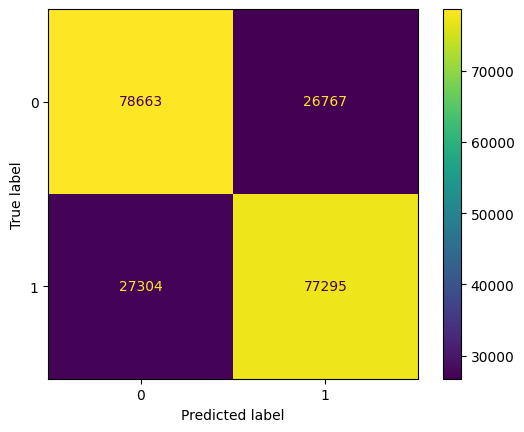

In [90]:
cm_graph_LogReg_CV = ConfusionMatrixDisplay(confusion_matrix=cm_LogReg_CV, display_labels=LogReg_CV.classes_)
cm_graph_LogReg_CV.plot()

### K-Nearest Neighbour

In [91]:
# 
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc_y_pred = knc.predict(X_test)
print("Score: {:.3f}".format(knc.score(X_train, y_train)))
print("Score: {:.3f}".format(knc.score(X_test, y_test)))

Score: 0.837
Score: 0.752


In [92]:
# LÆS OP PÅ SCALING
scaler = MinMaxScaler()

X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.transform(X_test)

In [93]:


knn_pipeline = Pipeline([('mms', MinMaxScaler()), ('knn', KNeighborsClassifier())])

param_grid = [{'knn__n_neighbors': [5, 50, 100], 'knn__weights': ['uniform', 'distance']}]

Grid_knn = GridSearchCV(knn_pipeline,
                      param_grid,
                      scoring='accuracy',
                      cv=5, 
                      n_jobs=3)

Grid_knn.fit(X_trainS, y_train)
Grid_knn.best_params_



{'knn__n_neighbors': 5, 'knn__weights': 'distance'}

{'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [94]:
knc_Grid = KNeighborsClassifier(n_neighbors=5, weights='distance',n_jobs=3)
knc_Grid.fit(X_trainS, y_train)
knc_Grid_y_pred = knc_Grid.predict(X_testS)
print("Score: {:.3f}".format(knc_Grid.score(X_trainS, y_train)))
print("Score: {:.3f}".format(knc_Grid.score(X_testS, y_test)))

Score: 1.000
Score: 0.881


Evaluation and confusion matrix

Accuracy on training:: 1.000
Accuracy on test: 0.881
              precision    recall  f1-score   support

           0     0.8955    0.8627    0.8788    105430
           1     0.8665    0.8985    0.8822    104599

    accuracy                         0.8805    210029
   macro avg     0.8810    0.8806    0.8805    210029
weighted avg     0.8811    0.8805    0.8805    210029

[[90955 14475]
 [10614 93985]]


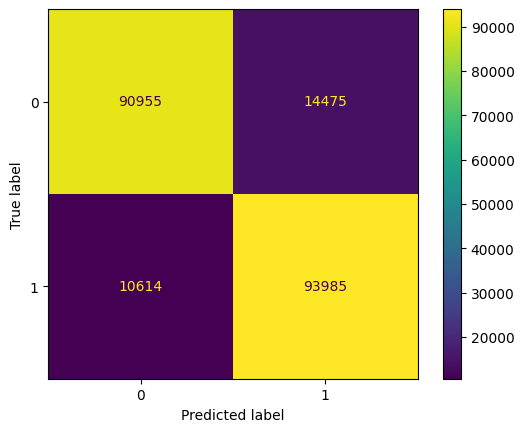

In [103]:
# KNN w. Grid search and scaling
print("Accuracy on training:: {:.3f}".format(knc_Grid.score(X_trainS, y_train)))
print("Accuracy on test: {:.3f}".format(knc_Grid.score(X_testS, y_test)))

print(classification_report(y_test, knc_Grid_y_pred, digits = 4))

cm_knc = confusion_matrix(y_test, knc_Grid_y_pred)
print(cm_knc)

cm_graph_knc = ConfusionMatrixDisplay(confusion_matrix=cm_knc, display_labels=knc_Grid.classes_)
cm_graph_knc.plot()

### Decision Tree

In [96]:
dtree = tree.DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=2500) 
dtree.fit(X_train, y_train)

dtree_y_pred = dtree.predict(X_test)

print("Score: {:.3f}".format(dtree.score(X_train, y_train)))
print("Score: {:.3f}".format(dtree.score(X_test, y_test)))

Score: 0.873
Score: 0.872


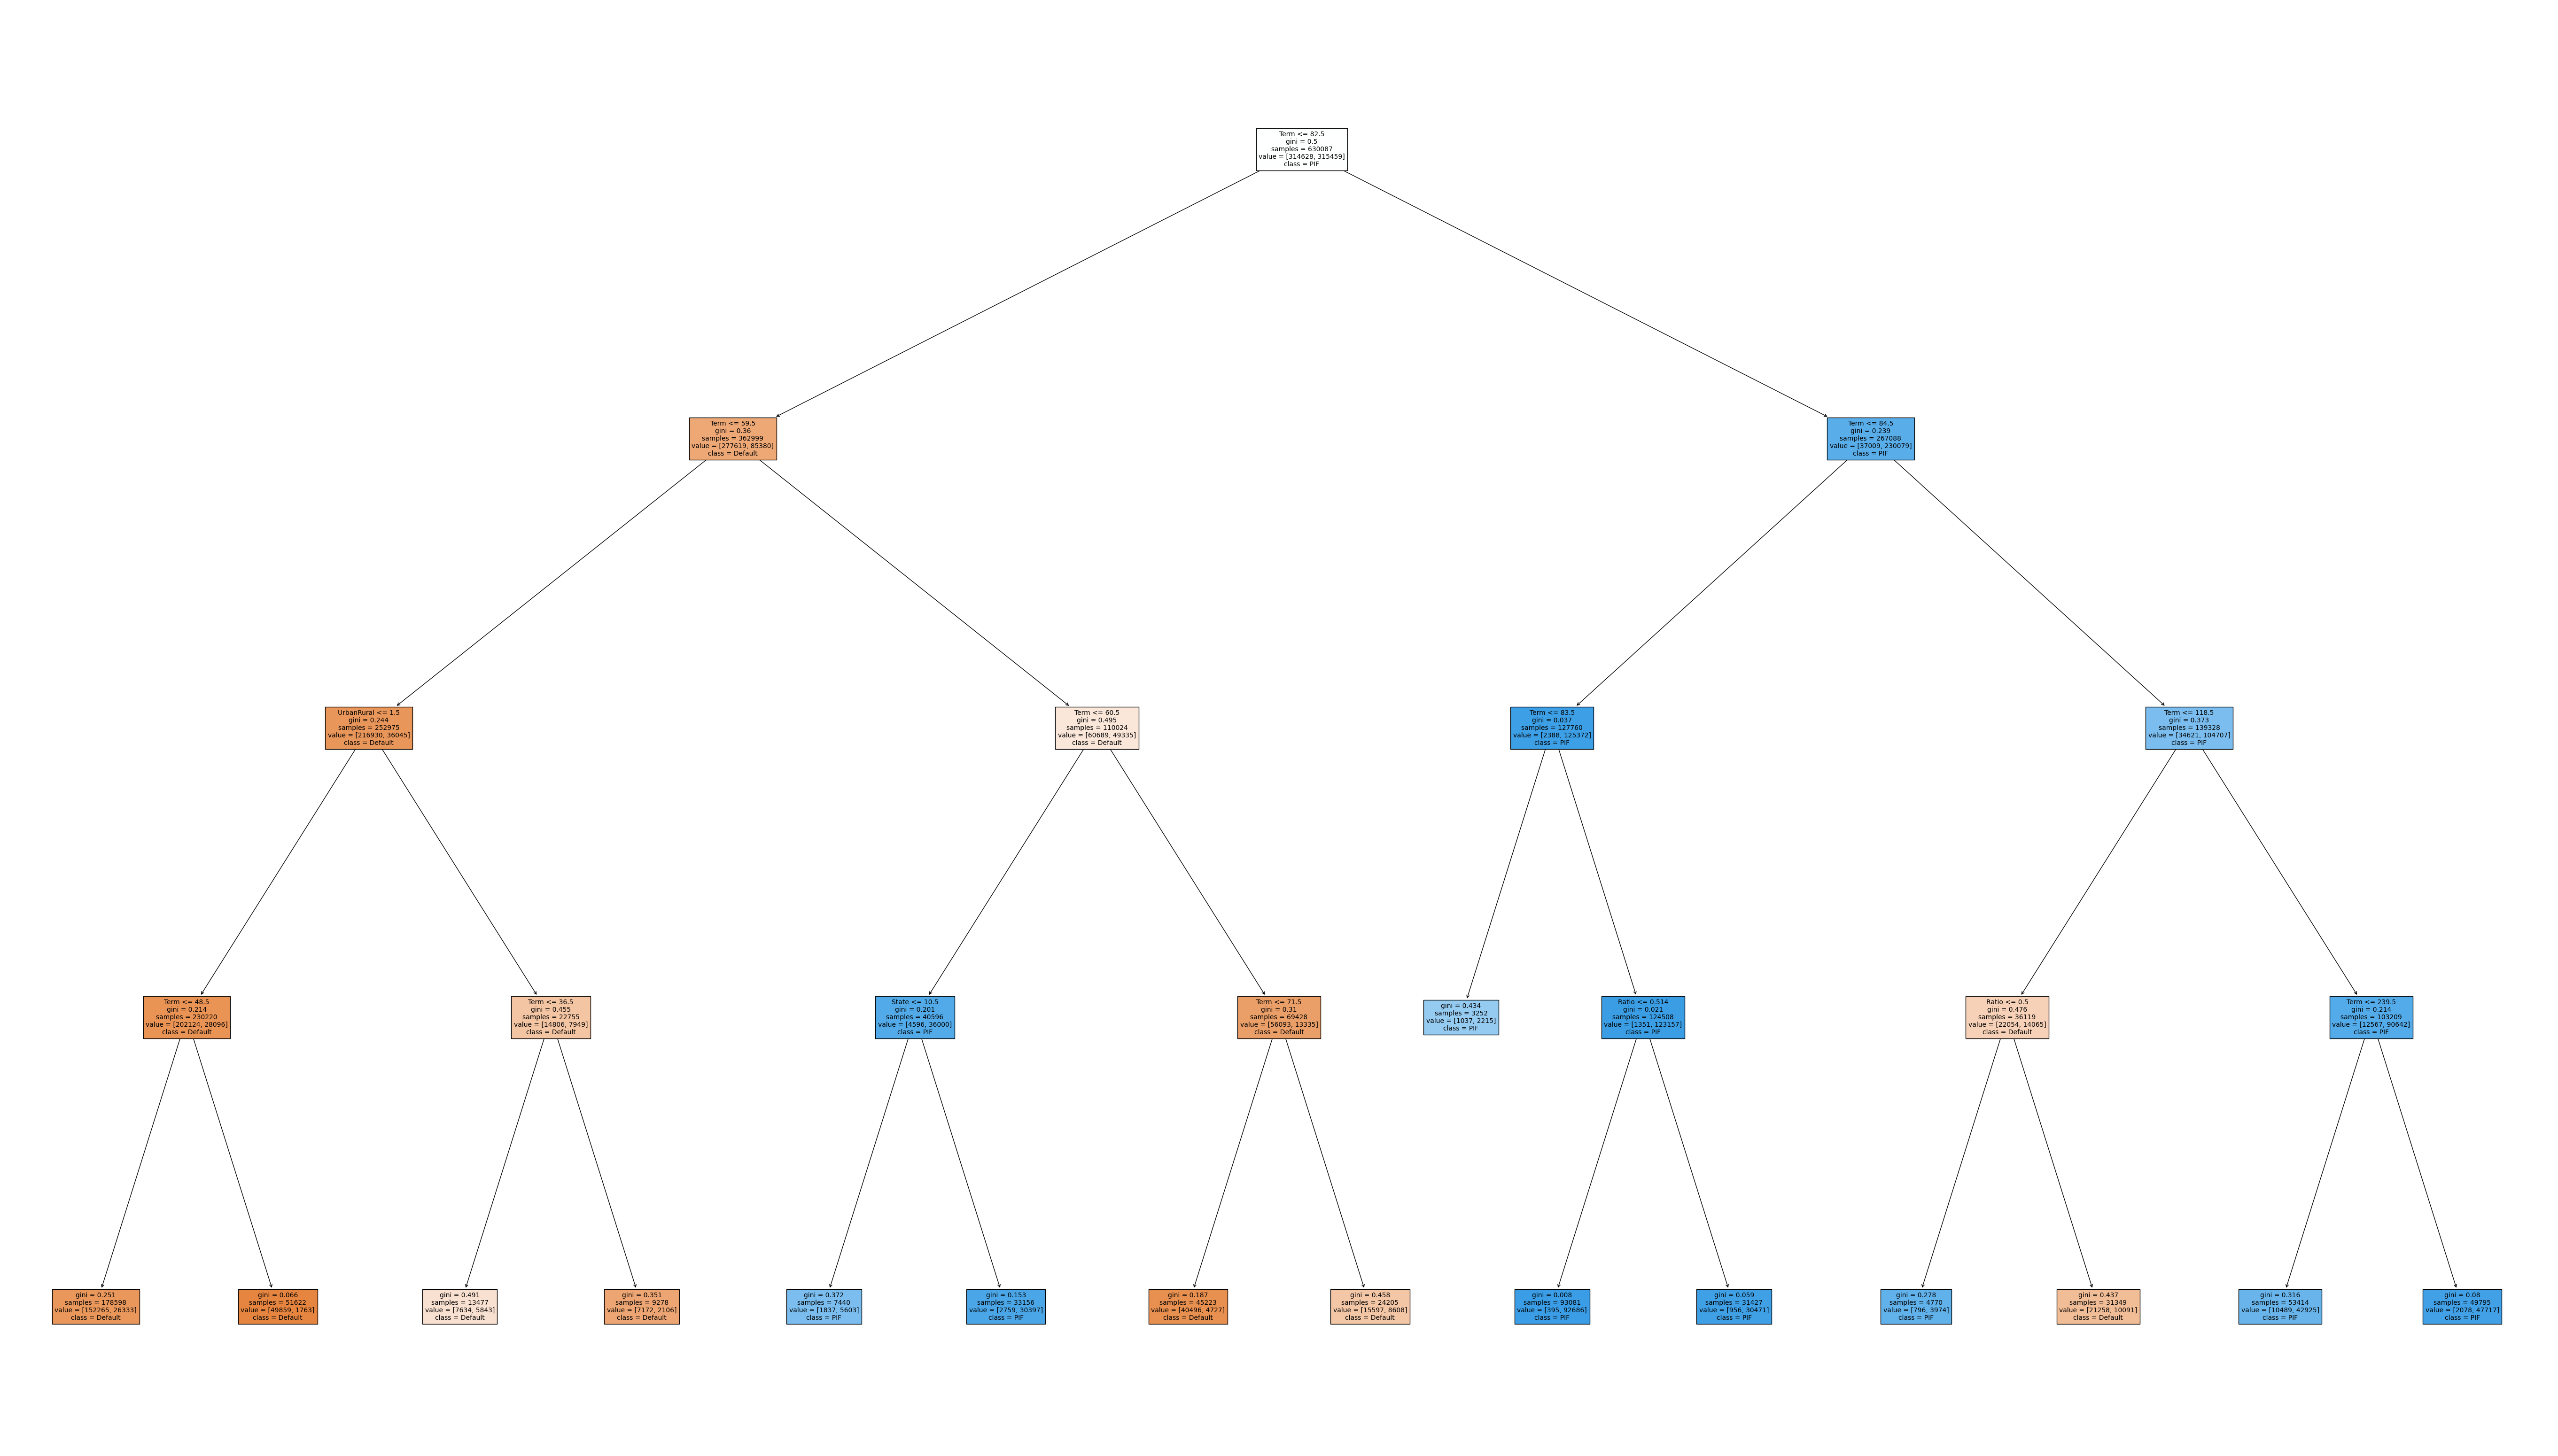

In [97]:
plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
tree.plot_tree(dtree,
               class_names=["Default", "PIF"],
               feature_names=list(X.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('DecisionTree.png', bbox_inches='tight') # Saving as png

In [98]:
# https://mkdtycl97.medium.com/tree-type-prediction-with-xgboost-classifier-c19ed4ed3686
xgb = XGBClassifier()

param = {
    'n_estimators' : [100, 500],
    'subsample': [0.8, 1],
    'max_depth': [4, 5, 6],  
    'learning_rate':[0.1, 0.3]} 

xgb_CV = GridSearchCV(xgb, param, cv=2, n_jobs=1, verbose=3)

xgb_CV.fit(X_train, y_train)

xgb_CV.best_params_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=0.924 total time=   1.5s
[CV 2/2] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=0.924 total time=   1.4s
[CV 1/2] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1;, score=0.923 total time=   1.1s
[CV 2/2] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1;, score=0.924 total time=   1.0s
[CV 1/2] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=0.8;, score=0.943 total time=   5.8s
[CV 2/2] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=0.8;, score=0.943 total time=   5.8s
[CV 1/2] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1;, score=0.943 total time=   4.0s
[CV 2/2] END learning_rate=0.1, max_depth=4, n_estimators=500, subsample=1;, score=0.943 total time=   3.9s
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=100, subs

{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 500, 'subsample': 1}

In [99]:
xgb_CV_tuned = XGBClassifier(n_estimators=500, subsample=0.8, max_depth=4, learning_rate=0.1)

xgb_CV_tuned.fit(X_train, y_train)

xgb_CV_y_pred = xgb_CV_tuned.predict(X_test)

print("Score: {:.3f}".format(xgb_CV.score(X_train, y_train)))
print("Score: {:.3f}".format(xgb_CV.score(X_test, y_test)))

Score: 0.962
Score: 0.950


Evaluation and confusion matrix

              precision    recall  f1-score   support

           0     0.9418    0.9447    0.9432    105430
           1     0.9441    0.9411    0.9426    104599

    accuracy                         0.9429    210029
   macro avg     0.9429    0.9429    0.9429    210029
weighted avg     0.9429    0.9429    0.9429    210029

[[99599  5831]
 [ 6160 98439]]


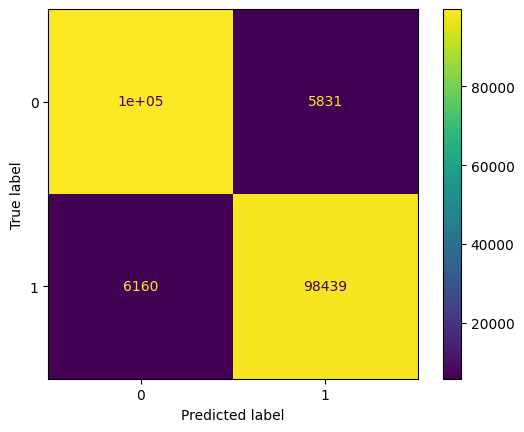

In [100]:
# Normal dtree
print("Accuracy on training: {:.3f}".format(xgb_CV.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(xgb_CV.score(X_test, y_test)))

print(classification_report(y_test, xgb_CV_y_pred ,digits = 4))

cm_xgb_CV = confusion_matrix(y_test, xgb_CV_y_pred)
print(cm_xgb_CV)

cm_graph_XGB = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_CV, display_labels=xgb_CV.classes_)
cm_graph_XGB.plot()

In [ ]:


knn_pipeline = Pipeline([('mms', MinMaxScaler()), ('knn', KNeighborsClassifier())])

param_grid = [{'knn__n_neighbors': [5, 50, 100], 'knn__weights': ['uniform', 'distance']}]

Grid_knn = GridSearchCV(knn_pipeline,
                      param_grid,
                      scoring='accuracy',
                      cv=5, 
                      n_jobs=3)

Grid_knn.fit(X_trainS, y_train)
Grid_knn.best_params_

